In [1]:
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
import make_plot
import numpy as np

In [2]:
# define the ODE function
def breast_cancer_ode(t, y, a, T_max, mu, gamma, alpha, d, s, lam, sigma, f, g, h, p, m, j, k, q, r, chemo_times):
    """ Model for breast cancer growth dependent on chemotherapy and 2 different immune system
    cells.

    Parameters:

    
    """
    T, N, L = y
    gompertz = a*T*np.log(T_max / T)
    D = d * ((L/T)**lam)/(s + (L/T)**lam) * T

    # chemo treatment times
    chemo_term = 0
    for day in chemo_times:
        if t >= day:
            t_since_start = t - day
            ct = np.exp(-gamma*(t_since_start))
            chemo_term += mu*ct*T

    eqT = gompertz - chemo_term - alpha*N*T - D
    eqN = sigma - f*N + N*(g*T**2)/(h + T**2) - p*N*T - 0.00005*chemo_term*N
    eqL = -m*L +  L*(j*D**2)/(k+D**2) - q*L*T + r*N*T - 0.00005*chemo_term*L
    return np.array([eqT, eqN, eqL])

In [11]:
##########
# Choose model parameters
##########
# gompertz parameters
a, T_max = 1/90, 1/(1.023e-9) # growth rate: 1/day, maximum tumor burden: # cells

# chemotherapy parameters
mu, gamma = 0.9, 0.92 # drug sensitivity of cells, decay constant of chemo drug: 1/day (ln(2)/half life of drug)

# parameters for D
d, s, lam = 5.80, 2.5e-1, 1.36 

# parameters for derivative of N, number of killer cells
alpha = 3.23e-7 # name for 'c' the kill rate of untrained killer cells: 1/(cell*day)
sigma, f = 1.3e4, 4.12e-2 # constant source of NK cells: cells/day, death rate of NK cells: 1/day
g = 2.5e-2 # max recruitment rate of NK cells by the tumor: 1/day
h, p = 2.02e7, 1e-7 # steepness of NK recruitment curve: cell**2, NK death rate by cancer cells: 1/(cell*day)

# parameters for derivative of L, the CD8 cells
m, j = 2e-2, 3.75e-2 # death rate of CD8 cells: 1/day, max CD8 recruitment rate: 1/day
k = 2e7 # steepness coefficient of CD8 recruitment curve: cell**2
q = 3.42e-10 # Inactivation rate of CD8 by cancer cells: 1/(cell*day)
r = 1.1e-7  # rate at which NK cells killing cancer cells stimulates CD8 cells

# chemo treatment days
n_treatments = 8
days_between_treatments = 21
chemo_days = np.arange(60, 60+days_between_treatments*n_treatments, days_between_treatments)


# the time domain and initial guess
n_years = 1.5
t_span = (0.1, 365*n_years) # 1 years
y0 = np.array([4.64e8, 2e4, 4e3]) # Tumor burden, Nk cells, CD8 cells

In [12]:
#############
# solve the system
#############
sol = solve_ivp(breast_cancer_ode, t_span, y0, args=[a, T_max, mu, gamma, alpha, d, s, lam, sigma, f, g, h, p, m, j, k, q, r, chemo_days], max_step=0.8)

/var/folders/l8/60hs794140d16gffhvwt3qd40000gn/T/ipykernel_17984/3396959550.py:12: RuntimeWarning: invalid value encountered in scalar power
  D = d * ((L/T)**lam)/(s + (L/T)**lam) * T
/var/folders/l8/60hs794140d16gffhvwt3qd40000gn/T/ipykernel_17984/3396959550.py:11: RuntimeWarning: invalid value encountered in log
  gompertz = a*T*np.log(T_max / T)


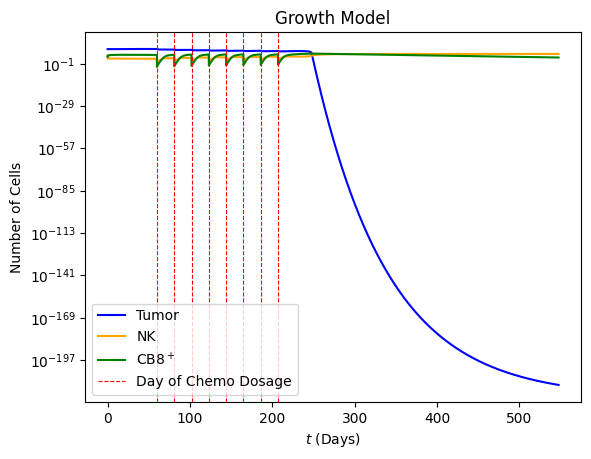

In [13]:
make_plot.plot(chemo_days=chemo_days, semilogy=True, plot_all=True, sol=sol)

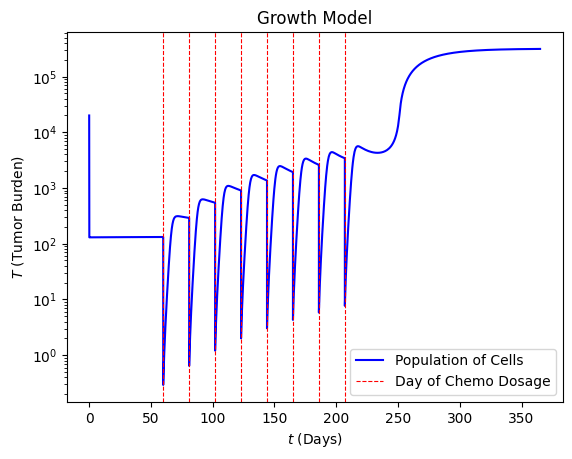

In [16]:
make_plot.plot(t_vals=sol.t, sol_vals=NK, chemo_days=chemo_days, semilogy=True)

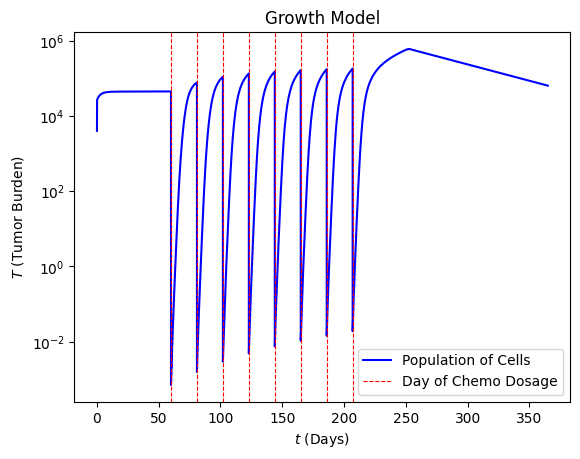

In [17]:
make_plot.plot(t_vals=sol.t, sol_vals=CB8, chemo_days=chemo_days, semilogy=True)

/var/folders/zl/1w6b2xdd3k1djjqk561_wwr40000gr/T/ipykernel_24372/172808170.py:11: RuntimeWarning: invalid value encountered in log
  gompertz = a*T*np.log(T_max / T)
/var/folders/zl/1w6b2xdd3k1djjqk561_wwr40000gr/T/ipykernel_24372/172808170.py:12: RuntimeWarning: invalid value encountered in scalar power
  D = d * ((L/T)**lam)/(s + (L/T)**lam) * T


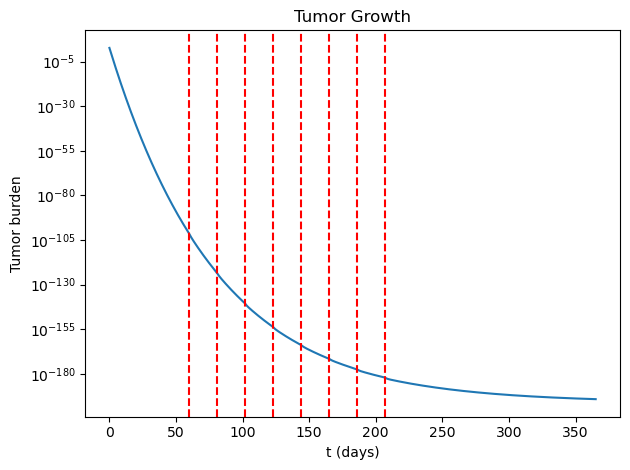

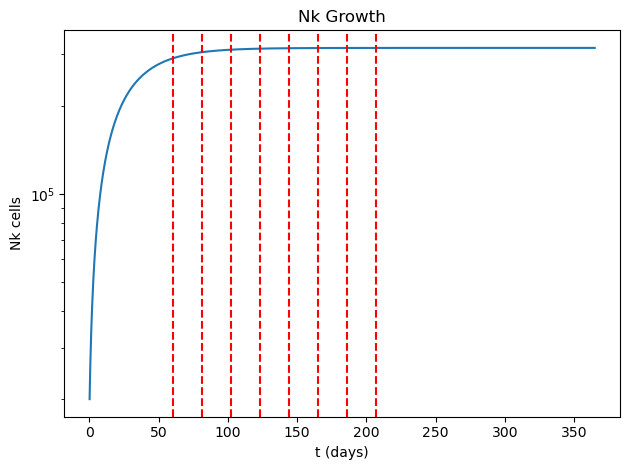

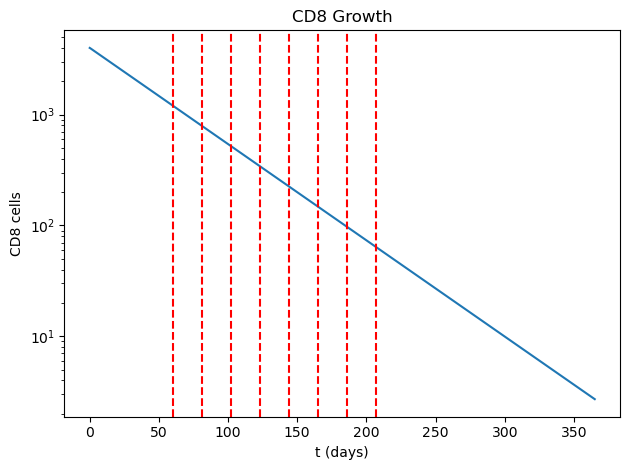

In [62]:
"""Model a small cancer and see if immune response squashes it"""

##########
# Choose model parameters
##########

# the time domain and initial guess
y0 = np.array([4.64e2, 2e4, 4e3]) # Tumor burden, Nk cells, CD8 cells

#############
# solve the system
#############
sol = solve_ivp(breast_cancer_ode, t_span, y0, args=[a, T_max, mu, gamma, alpha, d, s, lam, sigma, f, g, h, p, m, j, k, q, r, chemo_days], max_step=0.8)

plot_cancer_immune(sol, chemo_days)